In [2]:
import librosa

audio, sr = librosa.load(r"C:\Users\HP\Downloads\birdclef-2025\train_audio\21038\iNat65519.ogg", sr=None)  # sr=None retains original sample rate

In [3]:
duration = len(audio) / sr  # Duration in seconds
print(f"Duration: {duration:.2f}s")

Duration: 382.30s


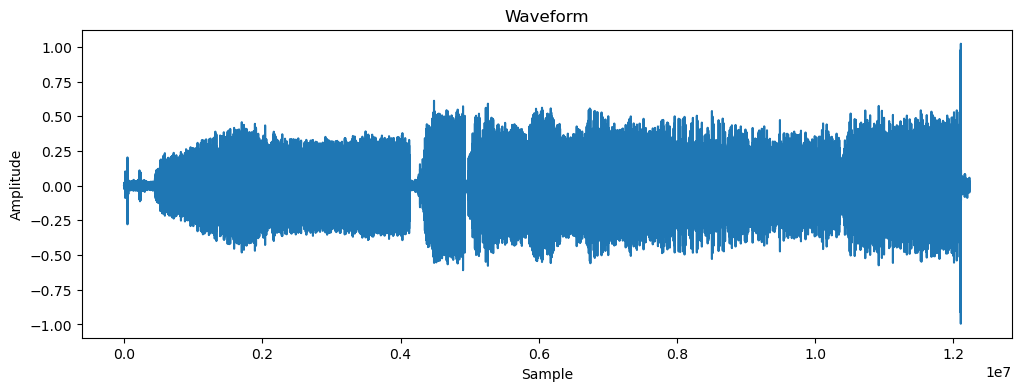

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

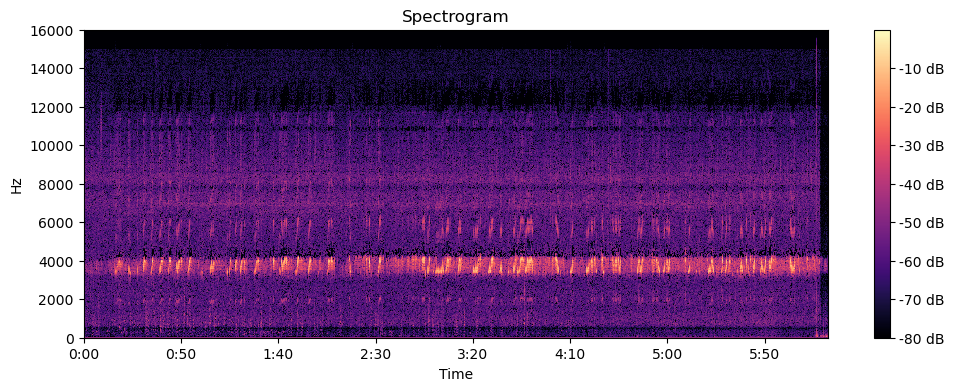

In [7]:
import numpy as np

D = librosa.stft(audio)  # Short-Time Fourier Transform
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [8]:
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low')
    return b, a

def apply_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    return lfilter(b, a, data)

filtered_audio = apply_filter(audio, 1000, sr)  # 1 kHz cutoff

In [9]:
import soundfile as sf

sf.write('filtered_audio.wav', filtered_audio, sr)

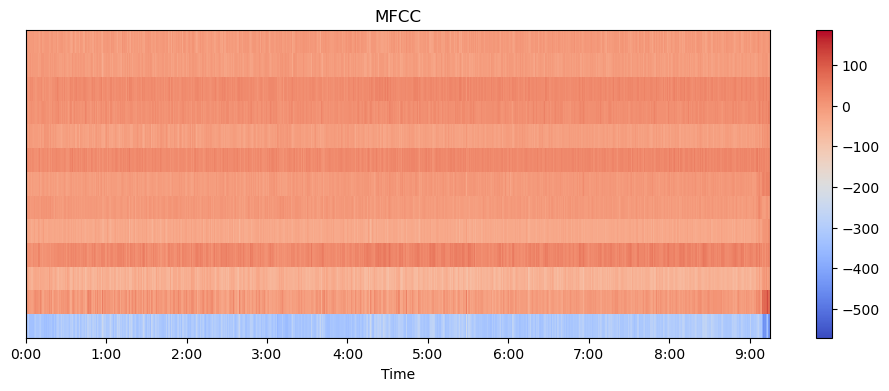

In [12]:
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

In [13]:
import pyaudio
import numpy as np

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

p = pyaudio.PyAudio()

# Open stream
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=CHUNK
)

print("Recording...")
frames = []
for _ in range(int(RATE / CHUNK * 5)):  # Record for 5 seconds
    data = stream.read(CHUNK)
    frames.append(np.frombuffer(data, dtype=np.int16))

stream.stop_stream()
stream.close()
p.terminate()

# Process frames here (e.g., apply filter)

Recording...
